In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
# import needed libraries

In [0]:
df_train = pd.read_csv('WINE.csv')
df_test = pd.read_csv('TEST.csv')
# Download Train and test sets from CSV file

In [0]:
df_train.drop('Index', axis = 1, inplace = True)
df_test.drop('Index', axis = 1, inplace = True)
# Drop 'Index' column from train and test sets

In [0]:
Y = np.array(df_train['Target'].astype('int32')).reshape(len(df_train['Target']),1)
# Create an array of labels ('Target' column) and make two-dimensional array

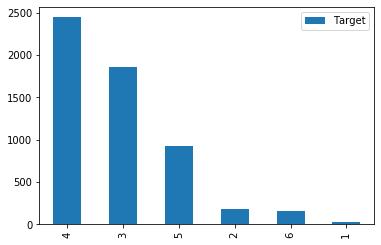

In [0]:
df_train['Target'].value_counts().plot.bar(legend=True)
# Plot target bar plot to check how classes are distributed

In [0]:
df_train.isna().sum()
# Check Nan values in train set

Target       0
Type         0
Alcohol      0
Density      0
Nitrogen     0
pH           0
Sugar        0
A           33
B            0
C            0
D            0
Di           0
E            0
H           16
S            0
U            0
V            0
dtype: int64

In [0]:
df_train.loc[df_train['A'].isna(),'A'] = df_train['A'].mean()
df_train.loc[df_train['H'].isna(),'H'] = df_train['H'].mean()
# Fill empty NaN positions with mean value in correspondning columns

In [0]:
df_test.isna().sum()
# Check Nan values in test set. Any Nan values found

Type        0
Alcohol     0
Density     0
Nitrogen    0
pH          0
Sugar       0
A           0
B           0
C           0
D           0
Di          0
E           0
H           0
S           0
U           0
V           0
dtype: int64

In [0]:
df_train1 = pd.get_dummies(df_train['Type'])
df1_test = pd.get_dummies(df_test['Type'])
df_train.insert(loc = 1, column = 'red_wine', value = df_train1['red_wine'])
df_train.insert(loc = 2, column = 'white_wine', value = df_train1['white_wine'])
df_test.insert(loc = 1, column = 'red_wine', value = df1_test['red_wine'])
df_test.insert(loc = 2, column = 'white_wine', value = df1_test['white_wine'])
df_test.drop('Type', axis = 1, inplace = True)
df_train.drop('Type', axis = 1, inplace = True)
# Replace type columns in train and test sets with one-hot encoding

In [0]:
for i in df_train.columns:
    print(stats.normaltest(df_train[i]), i)
# Check columns in train and test sets for normal distribution. P-value is less 0.05, so zero hepothesis
# that data are distributed normally is rejected

NormaltestResult(statistic=29.368644201807314, pvalue=4.1944975116155016e-07) Target
NormaltestResult(statistic=1026.7483398086156, pvalue=1.1077221983350797e-223) red_wine
NormaltestResult(statistic=1026.7483398086163, pvalue=1.1077221983347008e-223) white_wine
NormaltestResult(statistic=374.7227013706308, pvalue=4.265788071012327e-82) Alcohol
NormaltestResult(statistic=12195.926086728006, pvalue=0.0) Density
NormaltestResult(statistic=1682.939433367956, pvalue=0.0) Nitrogen
NormaltestResult(statistic=151.5256927768978, pvalue=1.2491479518269623e-33) pH
NormaltestResult(statistic=1737.4618007161766, pvalue=0.0) Sugar
NormaltestResult(statistic=2003.294658433871, pvalue=0.0) A
NormaltestResult(statistic=1416.56449475042, pvalue=2.494183115449629e-308) B
NormaltestResult(statistic=512.285781221163, pvalue=5.735298538436625e-112) C
NormaltestResult(statistic=1880.4115994556896, pvalue=0.0) D
NormaltestResult(statistic=1566.4043804804849, pvalue=0.0) Di
NormaltestResult(statistic=3.687395

In [0]:
for i in df_test.columns:
    print(stats.normaltest(df_test[i]), i)

NormaltestResult(statistic=155.03695197791052, pvalue=2.158507850109449e-34) red_wine
NormaltestResult(statistic=155.0369519779105, pvalue=2.15850785010948e-34) white_wine
NormaltestResult(statistic=64.34014292329005, pvalue=1.0683547414170053e-14) Alcohol
NormaltestResult(statistic=11408.961465076765, pvalue=0.0) Density
NormaltestResult(statistic=260.18567491827133, pvalue=3.172477541693559e-57) Nitrogen
NormaltestResult(statistic=15.561108699832898, pvalue=0.000417780513813447) pH
NormaltestResult(statistic=133.73942555941593, pvalue=9.096047787463891e-30) Sugar
NormaltestResult(statistic=316.87610800515847, pvalue=1.553200147762974e-69) A
NormaltestResult(statistic=313.02652316373525, pvalue=1.0645207966754948e-68) B
NormaltestResult(statistic=62.57062932960966, pvalue=2.5879773822033622e-14) C
NormaltestResult(statistic=81.77816029805467, pvalue=1.746216635202754e-18) D
NormaltestResult(statistic=74.46356536100456, pvalue=6.767717632021057e-17) Di
NormaltestResult(statistic=3.3606

In [0]:
df_train.describe()

,Target,red_wine,white_wine,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.00000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,3.812143,0.245000,0.755000,8.337791,1.039718,5.250179,3.427979,5.59803,24.539752,3.421562,4.776455,32.608714,43.709220,1.366580,2.909697,4.544402,5.516623,0.145773
std,0.864077,0.430126,0.430126,0.591844,0.457331,3.698764,0.165377,4.54153,2.565825,2.155710,2.170485,19.532201,20.156748,0.349658,2.118601,2.174807,2.820828,0.094536
min,1.000000,0.000000,0.000000,7.100000,1.010000,0.000000,2.910000,0.97000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,7.850000,1.010000,2.740000,3.320000,2.11000,22.900000,1.980000,3.750000,17.600000,28.780000,1.130000,1.800000,3.070000,3.650000,0.070000
50%,4.000000,0.000000,1.000000,8.250000,1.020000,4.450000,3.420000,3.25000,24.100000,2.770000,4.650000,30.800000,41.695000,1.360000,2.360000,4.230000,5.650000,0.140000
75%,4.000000,0.000000,1.000000,8.750000,1.020000,6.860000,3.530000,8.19000,25.500000,4.220000,5.850000,45.100000,56.120000,1.600000,3.470000,5.550000,7.500000,0.210000
max,6.000000,1.000000,1.000000,10.550000,10.210000,30.720000,4.240000,62.91000,41.900000,16.500000,24.900000,316.800000,318.220000,2.600000,37.260000,25.990000,21.700000,0.520000


In [0]:
df_train.corr(method='pearson')
# Check correlation coeffitients through all columns
# The major impact on target has 'Alcohol' column. D, Di and U columns have strong linear correlation between each other,
# what can reduce model performance

,Target,red_wine,white_wine,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,Di,E,H,S,U,V
Target,1.000000,-0.123147,0.123147,0.443372,-0.017056,-0.020498,0.014953,-0.034612,-0.084444,-0.265365,0.080364,0.053842,0.052710,0.088247,-0.205618,0.032989,-0.044035,-0.024634
red_wine,-0.123147,1.000000,-1.000000,-0.034553,0.008459,0.175261,0.325614,-0.349697,0.484169,0.653131,-0.195298,-0.471614,-0.462824,-0.019165,0.513071,0.487297,-0.700452,0.370052
white_wine,0.123147,-1.000000,1.000000,0.034553,-0.008459,-0.175261,-0.325614,0.349697,-0.484169,-0.653131,0.195298,0.471614,0.462824,0.019165,-0.513071,-0.487297,0.700452,-0.370052
Alcohol,0.443372,-0.034553,0.034553,1.000000,-0.019559,-0.008110,0.125924,-0.360521,-0.101905,-0.038538,-0.017319,-0.179620,-0.174336,0.201134,-0.262074,-0.011120,-0.267743,0.009329
Density,-0.017056,0.008459,-0.008459,-0.019559,1.000000,-0.001917,0.009931,-0.005672,0.016158,0.014526,-0.009562,0.001530,-0.000986,-0.016213,0.013588,0.026676,0.000286,-0.005096
Nitrogen,-0.020498,0.175261,-0.175261,-0.008110,-0.001917,1.000000,0.063437,-0.075847,0.074519,0.117277,-0.026745,-0.063867,-0.065866,-0.009196,0.088266,0.081730,-0.117913,0.087117
pH,0.014953,0.325614,-0.325614,0.125924,0.009931,0.063437,1.000000,-0.262740,-0.256022,0.257674,-0.324859,-0.140378,-0.139621,0.019622,0.042332,0.193295,-0.235120,0.106297
Sugar,-0.034612,-0.349697,0.349697,-0.360521,-0.005672,-0.075847,-0.262740,1.000000,-0.113493,-0.194583,0.144319,0.399013,0.390314,-0.053191,-0.127706,-0.180735,0.496935,-0.127088
A,-0.084444,0.484169,-0.484169,-0.101905,0.016158,0.074519,-0.256022,-0.113493,1.000000,0.212403,0.316021,-0.289150,-0.281068,-0.013496,0.304334,0.301134,-0.329623,0.185817
B,-0.265365,0.653131,-0.653131,-0.038538,0.014526,0.117277,0.257674,-0.194583,0.212403,1.000000,-0.383300,-0.348472,-0.341040,0.005629,0.383161,0.231478,-0.407143,0.242766


In [0]:
df_train.drop(['Target', 'Di', 'U'], axis = 1, inplace = True)
df_test.drop(['Di', 'U'], axis = 1, inplace = True)
# Drop correlated columns from data set. 'D' column has the most impact on 'Target', so drop two other columns

In [0]:
df_test.corr(method='pearson')

,red_wine,white_wine,Alcohol,Density,Nitrogen,pH,Sugar,A,B,C,D,E,H,S,V
red_wine,1.000000,-1.000000,-0.019480,0.400383,0.164315,0.343726,-0.346787,0.496501,0.648491,-0.159942,-0.457614,0.008131,0.500513,0.484182,0.397485
white_wine,-1.000000,1.000000,0.019480,-0.400383,-0.164315,-0.343726,0.346787,-0.496501,-0.648491,0.159942,0.457614,-0.008131,-0.500513,-0.484182,-0.397485
Alcohol,-0.019480,0.019480,1.000000,-0.581894,0.039122,0.088457,-0.358655,-0.068316,-0.033204,0.027183,-0.172109,0.165008,-0.227440,0.073488,0.028186
Density,0.400383,-0.400383,-0.581894,1.000000,0.044124,0.082842,0.408034,0.309032,0.257241,-0.012508,0.034630,-0.092001,0.312369,0.142307,0.156255
Nitrogen,0.164315,-0.164315,0.039122,0.044124,1.000000,0.109315,-0.060250,0.025305,0.110763,-0.044320,-0.073871,0.046744,0.058693,0.063867,0.069888
pH,0.343726,-0.343726,0.088457,0.082842,0.109315,1.000000,-0.270862,-0.222772,0.292073,-0.371531,-0.173381,0.062760,0.052424,0.171676,0.130030
Sugar,-0.346787,0.346787,-0.358655,0.408034,-0.060250,-0.270862,1.000000,-0.110477,-0.220212,0.134627,0.433914,-0.102511,-0.134640,-0.208177,-0.138454
A,0.496501,-0.496501,-0.068316,0.309032,0.025305,-0.222772,-0.110477,1.000000,0.242967,0.353065,-0.234070,-0.026892,0.261859,0.301348,0.199203
B,0.648491,-0.648491,-0.033204,0.257241,0.110763,0.292073,-0.220212,0.242967,1.000000,-0.370924,-0.375313,-0.012140,0.331672,0.190954,0.244570
C,-0.159942,0.159942,0.027183,-0.012508,-0.044320,-0.371531,0.134627,0.353065,-0.370924,1.000000,0.146534,-0.042014,0.061677,0.104906,-0.074992


In [0]:
x = df_train.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
X = np.array(df).reshape(len(df),len(df.columns))

x = df_test.values 
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
X_test = np.array(df).reshape(len(df),len(df.columns))
# Use Min_max scaler to train and test sets to make it distributed in similar ranges

In [0]:
clf = RandomForestClassifier(max_depth = 20, random_state = 0)
# Approach is Random Forrest with depth 20. This algorythm is resistant to overfit and makes calssifictaion very well.

In [0]:
X_test.shape

(790, 15)

In [0]:
clf.fit(X,Y)
# Train classificator on train set and target value

c:\users\chernyshov\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chernyshov\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
Y_out = clf.predict(X)
# Use trained classificator on train set to predict classes

In [0]:
Y_out.shape

(5600,)

In [0]:
Y_out
# Output array of labels with shape (5600,)

array([3, 4, 3, ..., 4, 4, 4])

In [0]:
accuracy_score(Y,Y_out)
# Check accuracy score between predicted and true labels

0.9883928571428572

In [0]:
print(Y_out.min())
print(Y_out.max())
# Check min and max classes in output. As we can see, model not generalised on the most common classes

1
6


In [0]:
confusion_matrix(Y,Y_out)
# Use confusion matrix to detect how classificator predicts values
# As we can see, it's generalised well, and performs on train set great. Some False positives values presented in classes 3,4,5

array([[  24,    0,    0,    0,    1,    0],
       [   0,  177,    5,    0,    1,    0],
       [   0,    1, 1844,   12,    0,    1],
       [   0,    0,   21, 2420,    4,    0],
       [   0,    0,    1,   10,  920,    0],
       [   0,    0,    0,    4,    4,  150]], dtype=int64)

In [0]:
ans = clf.predict(X_test)
# create array of predictions for test set

In [0]:
df_ans = pd.DataFrame(ans)
# Create dataframe of predicted labels to plotting it

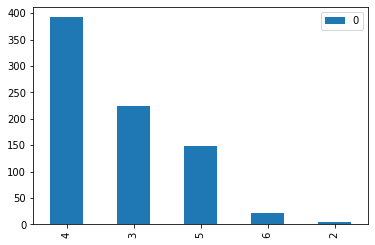

In [0]:
df_ans[0].value_counts().plot.bar(legend=True)
# Plot predicted labels

In [0]:
f1_score(Y, Y_out, average = 'weighted')
# Check f1_score, precision and recall of the model

0.9883768600227775

In [0]:
precision_score(Y,Y_out, average = 'weighted')

0.9884130410038268

In [0]:
recall_score(Y,Y_out, average = 'weighted')

0.9883928571428572

As we can see, Random Forest classifier works well without deep data analysis and preparation. Only two most correlated columns
were dropped from data frame, NaN values filled with mean in column values and after Min-max scaling, model was fitted on train set. Deep (20) forest model was used, but as Forrest is resistant to overfit and sets wasn't very big, this is the "+" sign for this approach. Precision, Recall and F1 scores were about 98%. Model predicted 5 classes on test set, instead 6 presented in train set. But class '1' was the minors of all, so we may conclude, that any wine in test set corresponds to '1'. Also, on test set we have class '6' more, than class '2'.
These problems can be solved, but need more preparation and work with data and the model, but actually it can be solved as it is, just by obtaining more training data.

In [0]:
df_ans.index = np.arange(5600,len(df)+5600)
df_ans.index.names = ['Index']
df_ans.to_csv('Submission_Random_forest.csv')